In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [3]:
house_price_dataset=pd.read_csv(r"C:\Users\TUFF\Downloads\archive (6)\HousingData.csv")

In [6]:
house_price_dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
house_price_dataset.rename(columns = {'MEDV':'price'}, inplace = True)

In [7]:
house_price_dataset.shape

(506, 14)

In [8]:
house_price_dataset.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
price       0
dtype: int64

In [9]:
house_price_dataset['CRIM'].fillna(house_price_dataset['CRIM'].mean(), inplace=True)

In [12]:
house_price_dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [11]:
house_price_dataset['ZN'].fillna(house_price_dataset['ZN'].mean(), inplace=True)
house_price_dataset['INDUS'].fillna(house_price_dataset['INDUS'].mean(), inplace=True)
house_price_dataset['CHAS'].fillna(house_price_dataset['CHAS'].mean(), inplace=True)
house_price_dataset['AGE'].fillna(house_price_dataset['AGE'].mean(), inplace=True)
house_price_dataset['LSTAT'].fillna(house_price_dataset['LSTAT'].mean(), inplace=True)

In [13]:
house_price_dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


UNDERSTANDING THE CORRELATION BETWEEN VARIOUS FEATURES IN THE DATA SET

In [14]:
correlation = house_price_dataset.corr()

<Axes: >

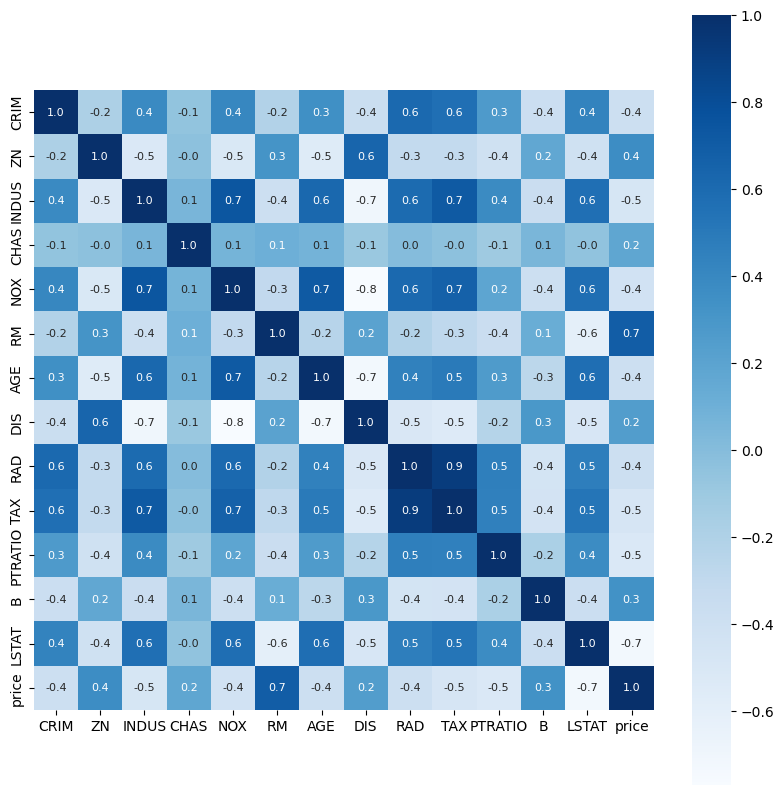

In [15]:
#constructiing a heat map to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True,annot_kws={'size':8}, cmap='Blues')

SPLITTING THE DATASETAND TARGET

In [16]:
x=house_price_dataset.drop(['price'], axis=1)
y=house_price_dataset['price']

In [17]:
print(x)
print(y)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900    1  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671    2  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671    2  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622    3  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786    1  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875    1  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675    1  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889    1  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050    1  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.9800

SPLITTING THE DATA INTO TRAINING DATA AND TESTING DATA

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=2)

In [20]:
print(x.shape, x_train.shape, x_test.shape)

(506, 13) (404, 13) (102, 13)


MODEL TRAINING

In [21]:
model=XGBRegressor()

In [22]:
#training the model with x_train
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [31]:
#accuracy for prediction on training data
training_data_prediction=model.predict(x_train)

In [32]:
print(training_data_prediction)

[23.118767  21.013851  20.104101  34.701595  13.900053  13.505482
 21.995434  15.17749   10.876621  22.698492  13.802304   5.6086135
 29.813776  49.996586  34.89296   20.623835  23.376873  19.19093
 32.68609   19.619205  26.98831    8.393243  46.00365   21.68819
 27.05935   19.348013  19.295418  24.818825  22.623287  31.690193
 18.554483   8.7028885 17.400768  23.698004  13.3178    10.50433
 12.731972  24.995485  19.688604  14.897341  24.219471  25.016657
 14.91027   16.994616  15.59779   12.6992    24.505219  15.016484
 49.99777   17.545815  21.186632  31.996737  15.594813  22.903502
 19.319153  18.737032  23.284954  37.19379   30.098276  33.089405
 20.990961  49.99099   13.398851   4.99892   16.498035   8.419112
 28.7009    19.502474  20.59031   45.391644  39.79551   33.409286
 19.812143  33.397102  25.265417  49.99778   12.545125  17.453466
 18.592224  22.60591   50.01338   23.788536  23.336613  23.106155
 41.699627  16.110195  31.618547  36.087624   7.008305  20.359346
 19.9894    

In [33]:
#R squared error
score_1 = metrics.r2_score(y_train, training_data_prediction)
#mean absolute error
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)
print("R squared error:", score_1)
print('mean Absolute Error:',score_2)

R squared error: 0.9999947912270895
mean Absolute Error: 0.014453256720363575


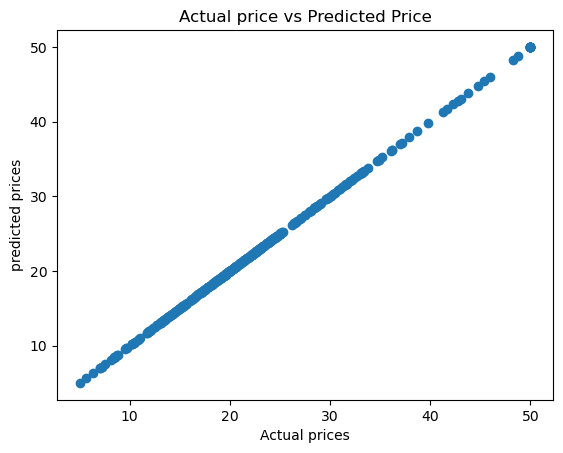

In [34]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title("Actual price vs Predicted Price")
plt.show()

In [27]:
test_data_prediction=model.predict(x_test)

In [30]:
#R squared error
score_1 = metrics.r2_score(y_test, test_data_prediction)
#mean absolute error
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)
print("R squared error:", score_1)
print('mean Absolute Error:',score_2)

R squared error: 0.8749184856477541
mean Absolute Error: 2.2837465819190528


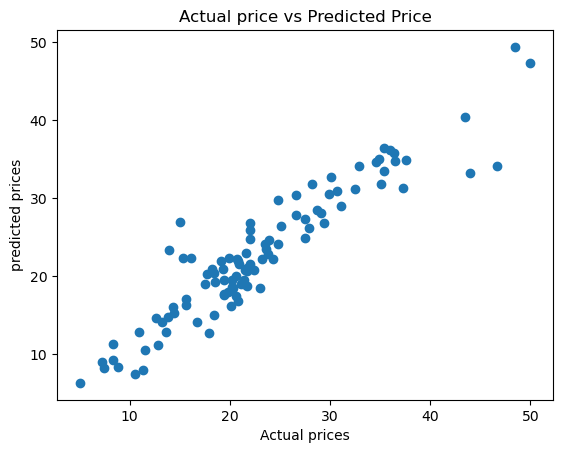

In [36]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("predicted prices")
plt.title("Actual price vs Predicted Price")
plt.show()